NAME:R.RAHINI
ROLL NO:215229128

# NLP With Disaster Tweets (Logistic Regression-80%)

# STEP 1:IMPORT DATASET

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
test_df = pd.read_csv('test.csv')
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


# TEXT CLEANING

1.LOWER CASE REMOVAL

In [4]:
train_df["text_clean"] = train_df["text"].apply(lambda x: x.lower())
test_df["text_clean"] = test_df["text"].apply(lambda x: x.lower())

2.SPECIAL CHARACTER REMOVAL

In [5]:
train_df['text']= train_df['text'].str.replace('rt ',"").str.replace('@','').str.replace('#','').str.replace('[^\w\s]','').str.replace('[1-9]','')
test_df['text']= test_df['text'].str.replace('rt ',"").str.replace('@','').str.replace('#','').str.replace('[^\w\s]','').str.replace('[1-9]','')

<ipython-input-5-d6d4313c5a9a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['text']= train_df['text'].str.replace('rt ',"").str.replace('@','').str.replace('#','').str.replace('[^\w\s]','').str.replace('[1-9]','')
<ipython-input-5-d6d4313c5a9a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_df['text']= test_df['text'].str.replace('rt ',"").str.replace('@','').str.replace('#','').str.replace('[^\w\s]','').str.replace('[1-9]','')


3.REMOVAL OF NON-ASCII VALUES

In [6]:
import re

In [7]:
def remove_non_ascii(text):
    return re.sub(r'[^\x00-\x7f]',r'', text)

train_df["text_clean"] = train_df["text_clean"].apply(lambda x: remove_non_ascii(x))
test_df["text_clean"] = test_df["text_clean"].apply(lambda x: remove_non_ascii(x))

# IMPORT NLTK

In [8]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rahin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
# STOP WORDS REMOVAL

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

train_df['text'] = train_df['text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
test_df['text'] = train_df['text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [10]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

# PREPROCESSING

1.FILLING MISSING VALUES

In [11]:
train_df.isnull().sum()

id               0
keyword         61
location      2533
text             0
target           0
text_clean       0
dtype: int64

In [12]:
test_df.isnull().sum()

id               0
keyword         26
location      1105
text             0
text_clean       0
dtype: int64

In [13]:
train_df['location'] = train_df['location'].fillna('None')
train_df['keyword'] = train_df['keyword'].fillna('None')
test_df['location'] = test_df['location'].fillna('None')
test_df['keyword'] = test_df['keyword'].fillna('None')

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

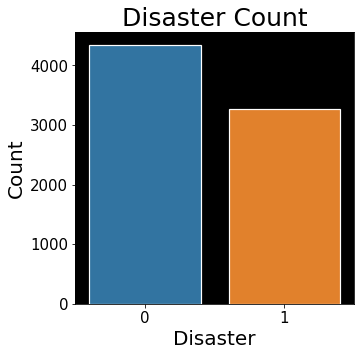

In [15]:
plt.figure(figsize = (5, 5))
ax = plt.axes()
ax.set_facecolor('black')
ax = sns.countplot(x = 'target', data = train_df, edgecolor = 'white', linewidth = 1.2)
plt.title('Disaster Count', fontsize = 25)
plt.xlabel('Disaster', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
ax.xaxis.set_tick_params(labelsize = 15)
ax.yaxis.set_tick_params(labelsize = 15)
bbox_args = dict(boxstyle = 'round', fc = '0.9')
plt.show()

# DROP OF UNNESSESSARY FEATURE

In [16]:
train_df = train_df.drop('id', axis=1)
test_df = test_df.drop('id', axis=1)

In [17]:
train_df

,keyword,location,text,target,text_clean
0,None,None,Our Deeds Reason earthquake May ALLAH Forgive us,1,our deeds are the reason of this #earthquake m...
1,None,None,Forest fire near La Ronge Sask Canada,1,forest fire near la ronge sask. canada
2,None,None,All residents asked shelter place notified off...,1,all residents asked to 'shelter in place' are ...
3,None,None,000 people receive wildfires evacuation orders...,1,"13,000 people receive #wildfires evacuation or..."
4,None,None,Just got sent photo Ruby Alaska smoke wildfire...,1,just got sent this photo from ruby #alaska as ...
...,...,...,...,...,...
7608,None,None,Two giant cranes holding bridge collapse nearb...,1,two giant cranes holding a bridge collapse int...
7609,None,None,aria_ahrary TheTawniest The control wild fires...,1,@aria_ahrary @thetawniest the out of control w...
7610,None,None,M 00 UTCkm S Volcano Hawaii httptcozDtoydEbJ,1,m1.94 [01:04 utc]?5km s of volcano hawaii. htt...
7611,None,None,Police investigating ebike collided car Little...,1,police investigating after an e-bike collided ...


In [18]:
test_df

,keyword,location,text,text_clean
0,None,None,Our Deeds Reason earthquake May ALLAH Forgive us,just happened a terrible car crash
1,None,None,Forest fire near La Ronge Sask Canada,"heard about #earthquake is different cities, s..."
2,None,None,All residents asked shelter place notified off...,"there is a forest fire at spot pond, geese are..."
3,None,None,000 people receive wildfires evacuation orders...,apocalypse lighting. #spokane #wildfires
4,None,None,Just got sent photo Ruby Alaska smoke wildfire...,typhoon soudelor kills 28 in china and taiwan
...,...,...,...,...
3258,None,None,Do feel engulfed low selfimage Take quiz httpt...,earthquake safety los angeles safety fastener...
3259,None,None,Man equally incapable seeing nothingness emerg...,storm in ri worse than last hurricane. my city...
3260,None,None,Fully Engulfed Garage Fire Propane Tanks Insid...,green line derailment in chicago http://t.co/u...
3261,None,None,He came land engulfed tribal war turned land p...,meg issues hazardous weather outlook (hwo) htt...


# TOKENIZATION

In [19]:
import nltk
from nltk import TweetTokenizer

tokenizer = TweetTokenizer()

train_df['tokens'] = [tokenizer.tokenize(item) for item in train_df.text]
test_df['tokens'] = [tokenizer.tokenize(item) for item in test_df.text]

In [20]:
train_df['tokens']

0       [Our, Deeds, Reason, earthquake, May, ALLAH, F...
1           [Forest, fire, near, La, Ronge, Sask, Canada]
2       [All, residents, asked, shelter, place, notifi...
3       [000, people, receive, wildfires, evacuation, ...
4       [Just, got, sent, photo, Ruby, Alaska, smoke, ...
                              ...                        
7608    [Two, giant, cranes, holding, bridge, collapse...
7609    [aria_ahrary, TheTawniest, The, control, wild,...
7610    [M, 00, UTCkm, S, Volcano, Hawaii, httptcozDto...
7611    [Police, investigating, ebike, collided, car, ...
7612    [The, Latest, More, Homes, Razed, Northern, Ca...
Name: tokens, Length: 7613, dtype: object

In [21]:
test_df['tokens']

0       [Our, Deeds, Reason, earthquake, May, ALLAH, F...
1           [Forest, fire, near, La, Ronge, Sask, Canada]
2       [All, residents, asked, shelter, place, notifi...
3       [000, people, receive, wildfires, evacuation, ...
4       [Just, got, sent, photo, Ruby, Alaska, smoke, ...
                              ...                        
3258    [Do, feel, engulfed, low, selfimage, Take, qui...
3259    [Man, equally, incapable, seeing, nothingness,...
3260    [Fully, Engulfed, Garage, Fire, Propane, Tanks...
3261    [He, came, land, engulfed, tribal, war, turned...
3262    [suelinflower, words, describe, physical, pain...
Name: tokens, Length: 3263, dtype: object

# LEMMATION

In [22]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_item(item):
    new_item = []
    for x in item:
        x = lemmatizer.lemmatize(x)
        new_item.append(x)
    return " ".join(new_item)

train_df['tokens'] = [lemmatize_item(item) for item in train_df.tokens]
test_df['tokens'] = [lemmatize_item(item) for item in test_df.tokens]

In [23]:
train_df['tokens']

0         Our Deeds Reason earthquake May ALLAH Forgive u
1                   Forest fire near La Ronge Sask Canada
2       All resident asked shelter place notified offi...
3       000 people receive wildfire evacuation order C...
4       Just got sent photo Ruby Alaska smoke wildfire...
                              ...                        
7608    Two giant crane holding bridge collapse nearby...
7609    aria_ahrary TheTawniest The control wild fire ...
7610         M 00 UTCkm S Volcano Hawaii httptcozDtoydEbJ
7611    Police investigating ebike collided car Little...
7612    The Latest More Homes Razed Northern Californi...
Name: tokens, Length: 7613, dtype: object

In [24]:
test_df['tokens']

0         Our Deeds Reason earthquake May ALLAH Forgive u
1                   Forest fire near La Ronge Sask Canada
2       All resident asked shelter place notified offi...
3       000 people receive wildfire evacuation order C...
4       Just got sent photo Ruby Alaska smoke wildfire...
                              ...                        
3258    Do feel engulfed low selfimage Take quiz httpt...
3259    Man equally incapable seeing nothingness emerg...
3260    Fully Engulfed Garage Fire Propane Tanks Insid...
3261    He came land engulfed tribal war turned land p...
3262    suelinflower word describe physical painthey r...
Name: tokens, Length: 3263, dtype: object

# VECTORIZER

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train_df.text).toarray()
y = train_df['target']

# DATA SPLITTING

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# DEFINE LOGISTIC REGRESSION

In [27]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)
log.fit(X_train, y_train)
log_pred = log.predict(X_test)

In [28]:
log_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
ss=StandardScaler()

In [31]:
scale=ss.fit_transform(X_test)

In [32]:
scale

array([[-0.13178797, -0.08911656, -0.03626189, ...,  0.        ,
        -0.0256326 ,  0.        ],
       [-0.13178797, -0.08911656, -0.03626189, ...,  0.        ,
        -0.0256326 ,  0.        ],
       [-0.13178797, -0.08911656, -0.03626189, ...,  0.        ,
        -0.0256326 ,  0.        ],
       ...,
       [-0.13178797, -0.08911656, -0.03626189, ...,  0.        ,
        -0.0256326 ,  0.        ],
       [-0.13178797, -0.08911656, -0.03626189, ...,  0.        ,
        -0.0256326 ,  0.        ],
       [-0.13178797, -0.08911656, -0.03626189, ...,  0.        ,
        -0.0256326 ,  0.        ]])

# DEFINE KNN MODEL

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X,y)

KNeighborsClassifier(n_neighbors=2)

In [36]:
y_predict=model.predict(X)
y_predict

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

# MODEL EVALUATION

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc = accuracy_score(y_test,log_pred)
print("\nACCURACY : ",acc)


ACCURACY :  0.8049901510177282


In [38]:
clf_report = classification_report(y_test,log_pred)
print("\nCLASSIFICATION REPORT:\n", clf_report)


CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       886
           1       0.82      0.68      0.75       637

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.81      0.80      0.80      1523



In [61]:
acc1=accuracy_score(y,y_predict)
print("\nACCURACY : ",acc1)


ACCURACY :  0.7556810718507816


In [60]:
clfs_report = classification_report(y,y_predict)
print("\nCLASSIFICATION REPORT:\n", clfs_report)


CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82      4342
           1       1.00      0.43      0.60      3271

    accuracy                           0.76      7613
   macro avg       0.85      0.72      0.71      7613
weighted avg       0.83      0.76      0.73      7613



In [39]:
import seaborn as sns
import matplotlib.pyplot as plt


CONFUSION MATRIX:


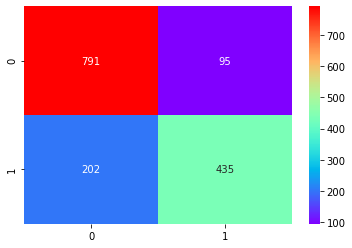

In [40]:
print("\nCONFUSION MATRIX:")
sns.heatmap(confusion_matrix(y_test,log_pred),annot=True,fmt='g',cmap="rainbow")
plt.show()


CONFUSION MATRIX:


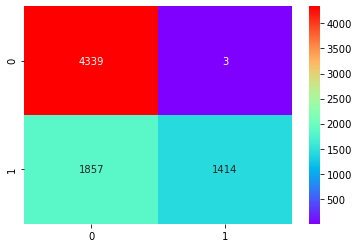

In [62]:
print("\nCONFUSION MATRIX:")
sns.heatmap(confusion_matrix(y,y_predict),annot=True,fmt='g',cmap="rainbow")
plt.show()

# PREDICTION

In [63]:
test = vectorizer.transform(test_df.text).toarray()
pred = log.predict(test)

In [64]:
pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [65]:
submission=pd.read_csv("submission.csv")

In [66]:
submission

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [67]:
submission["target"]=pred

In [68]:
submission.to_csv('Final.csv',index=False)

In [69]:
data=pd.read_csv("Final.csv")

In [70]:
data

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,0
3259,10865,0
3260,10868,1
3261,10874,0
